In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
from PIL import Image, ImageFilter

In [60]:
# Import data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [61]:
# PROBLEM 2
# Define model with maxpooling layers
max_model = models.Sequential([
    Conv2D( 32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
max_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit max model
max_history = max_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1730 - accuracy: 0.9458
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0484 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0264 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0204 - accuracy: 0.9940


In [62]:
# Define model with average pooling
avg_model = models.Sequential([
    Conv2D( 32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
avg_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
avg_history = avg_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2115 - accuracy: 0.9344
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0395 - accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0254 - accuracy: 0.9922


313/313 [==============================] - 1s 2ms/step - loss: 0.0302 - accuracy: 0.9903
0.03006403148174286
0.030189312994480133


&lt;matplotlib.legend.Legend at 0x14546ef10&gt;

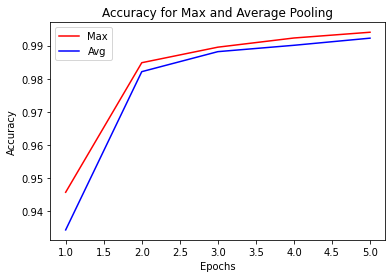

In [66]:
max_test_loss, max_test_acc = max_model.evaluate(test_images, test_labels)
avg_test_loss, avg_test_acc = avg_model.evaluate(test_images, test_labels)
max_accuracy = max_history.history['accuracy']
avg_accuracy = avg_history.history['accuracy']
epochs = range(1, len(max_accuracy) + 1)
plt.plot(epochs, max_accuracy, 'r', label='Max')
plt.plot(epochs, avg_accuracy, 'b', label='Avg')
plt.title('Accuracy for Max and Average Pooling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [71]:
# PROBLEM 3
# Define model with maxpooling layers
results = {}
filter_sizes = [ 
    ('3x3',(3,3)),
    ('4x4',(4,4)),
    ('5x5',(5,5)),
    ('6x6',(6,6))
]
num_epochs = 5
epochs = range(1, num_epochs + 1)
for filter_name, filter_size in filter_sizes:
    model = models.Sequential([
        Conv2D( 32, filter_size, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=64)
    accuracy = history.history['accuracy']
    results[filter_name] = accuracy

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1693 - accuracy: 0.9480
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1644 - accuracy: 0.9493
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0322 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0195 - accurac

&lt;matplotlib.legend.Legend at 0x14dc8ef40&gt;

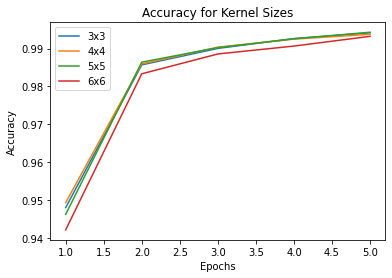

In [72]:
plt.clf()
for key, val in results.items():
    plt.plot(epochs, val, label=key)
plt.title('Accuracy for Kernel Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [76]:
# PROBLEM 4
results = {}

padding_model = models.Sequential([
    ZeroPadding2D(padding=(3,3)),
    Conv2D( 32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    ZeroPadding2D(padding=(3,3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    ZeroPadding2D(padding=(3,3)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
padding_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit max model
padding_model_history = padding_model.fit(train_images, train_labels, epochs=5, batch_size=64)
accuracy = padding_model_history.history['accuracy']
results['padding'] = accuracy

Epoch 1/5
938/938 [==============================] - 74s 79ms/step - loss: 0.1402 - accuracy: 0.9567
Epoch 2/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0415 - accuracy: 0.9879
Epoch 3/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0281 - accuracy: 0.9915
Epoch 4/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0211 - accuracy: 0.9936
Epoch 5/5
938/938 [==============================] - 69s 74ms/step - loss: 0.0178 - accuracy: 0.9946


In [77]:
no_padding_model = models.Sequential([
    Conv2D( 32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
no_padding_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit max model
no_padding_model_history = no_padding_model.fit(train_images, train_labels, epochs=5, batch_size=64)
accuracy = no_padding_model_history.history['accuracy']
results['no_padding'] = accuracy

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1641 - accuracy: 0.9488
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0449 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0240 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0195 - accuracy: 0.9940


In [78]:
results['original'] = max_accuracy

&lt;matplotlib.legend.Legend at 0x14e23d940&gt;

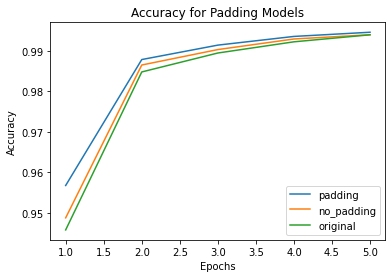

In [79]:
plt.clf()
for key, val in results.items():
    plt.plot(epochs, val, label=key)
plt.title('Accuracy for Padding Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [119]:
# PROBLEM 5
from PIL import Image
from urllib import request
url = 'https://cdn.cnn.com/cnnnext/dam/assets/200713171600-02-silk-road-cats-exlarge-169.jpg'
img = Image.open(request.urlopen(url))
size = (3,3)
kernel = (-1, -1, -1, -1, 8, -1, -1, -1, -1)
scale = 1
offset = 0
laplace_filter = ImageFilter.Kernel( size=size, kernel=kernel, scale=scale, offset=offset)
img_edge = img.filter(laplace_filter)

TypeError: cannot unpack non-iterable AxesSubplot object

&lt;Figure size 432x288 with 0 Axes&gt;

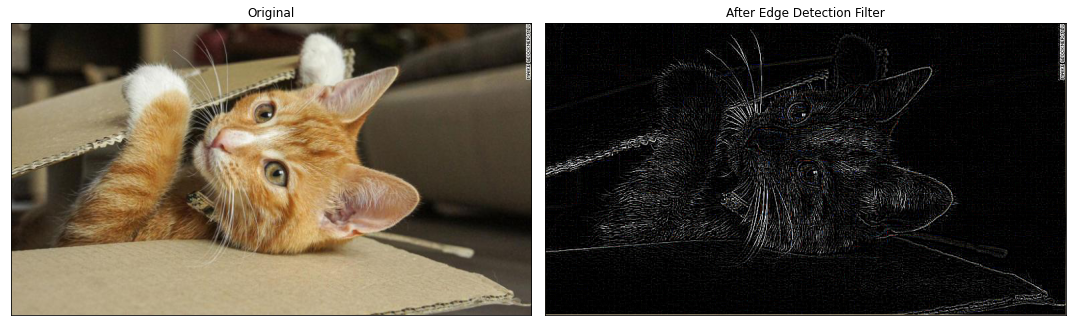

In [140]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.imshow(img)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original')

ax2.imshow(img_edge)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('After Edge Detection Filter')
fig.tight_layout()